In [3]:
import pandas as pd
dados = pd.read_csv('dados_unidade_3.csv')
dados.columns = [x.lower() for x in dados.columns]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
escalonar = dados.iloc[:,:10]
escalonar = pd.DataFrame(scaler.fit_transform(escalonar),columns=escalonar.columns)
escalonar['nox'] = dados['nox'].values
x = escalonar.iloc[:,:10].values
y = escalonar.iloc[:,10].values
from sklearn.model_selection import train_test_split, cross_val_score
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=0.8,random_state=3)

# Validação cruzada

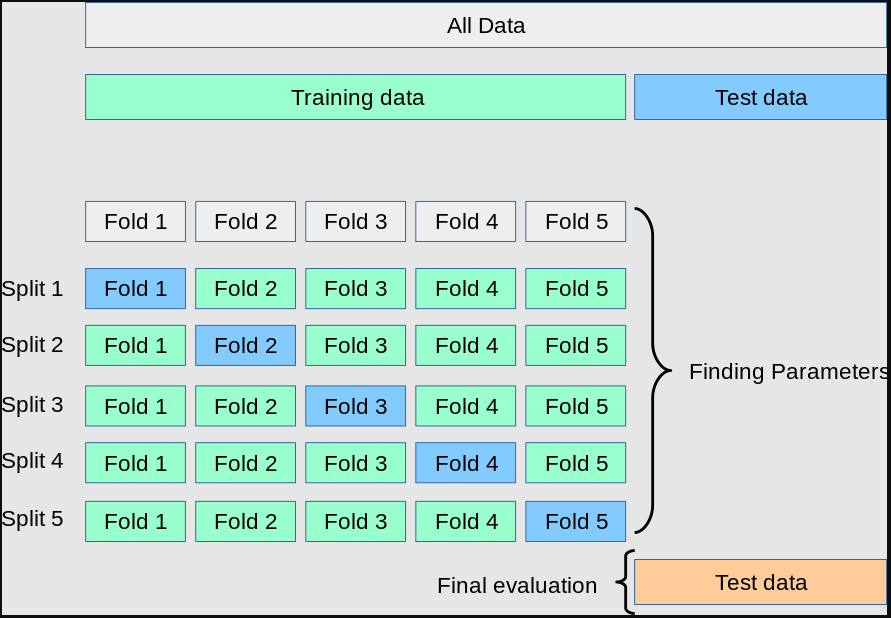

A validação cruzada é uma técnica utilizada em aprendizado de máquina para avaliar a capacidade de generalização de um modelo. Ela consiste em dividir o conjunto de dados em subconjuntos e realizar repetidos treinos e testes, garantindo que cada subconjunto seja usado como teste pelo menos uma vez.

## Objetivos:

* Estimar o desempenho do modelo: Ao avaliar o modelo em diferentes subconjuntos, obtém-se uma estimativa mais robusta de seu desempenho em dados não vistos.

* Reduzir o overfitting: A técnica proporciona uma visão mais realista da capacidade de generalização do modelo, uma vez que cada ponto de dados é usado tanto para treino quanto para teste.

* Utilizar os dados eficientemente: Em cenários com poucos dados, a validação cruzada permite maximizar o uso desses dados para treino e teste.

In [17]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
cross_val_scores = cross_val_score(modelo, x_treino, y_treino, cv=10, scoring='neg_mean_absolute_percentage_error',verbose=3)

[CV] END ............................... score: (test=-0.053) total time=   0.9s
[CV] END ............................... score: (test=-0.052) total time=   0.9s
[CV] END ............................... score: (test=-0.054) total time=   0.9s
[CV] END ............................... score: (test=-0.053) total time=   0.9s
[CV] END ............................... score: (test=-0.054) total time=   0.9s
[CV] END ............................... score: (test=-0.055) total time=   0.9s
[CV] END ............................... score: (test=-0.055) total time=   0.9s
[CV] END ............................... score: (test=-0.049) total time=   0.9s
[CV] END ............................... score: (test=-0.052) total time=   0.9s
[CV] END ............................... score: (test=-0.053) total time=   0.9s


In [18]:
mae_scores = -cross_val_scores
mae_scores

array([0.0529196 , 0.05169946, 0.05414634, 0.05280436, 0.05369227,
       0.05468082, 0.05494776, 0.04865241, 0.05213112, 0.05281855])

In [19]:
modelo.fit(x_treino,y_treino)
y_prev = modelo.predict(x_teste)

In [20]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_teste,y_prev)
mape

0.05282706786270835